# Propagation des incertitudes par la méthode de Monte-Carlo

On dispose de mesures pour deux valeurs physiques : $X = X_{\text{mes}} \pm u(X)$ et $Y = Y_{\text{mes}} \pm u(Y)$.

On cherche à calculer la grandeur $Z = f(X,Y)$ où $f$ est une fonction quelconque, et on veut l'incertitude $u(Z)$, l'objectif étant de noter le résultat sous la forme $Z = Z_{\text{mes}} \pm u(Z)$.

La valeur $Z_{\text{mes}}$ se calcule évidement simplement à l'aide de la fonction $f$ : $$ Z_{\text{mes}} = f( X_{\text{mes}} , Y_{\text{mes}} ) $$ mais l'obtention de l'incertitude est plus complexe...

#### Principe de la méthode
La principe de la méthode est le suivant :
* on simule des résultats d'expérience en tirant au hasard $N$ valeurs possibles pour $X$ et $Y$, notées $\lbrace X_1, ...  , X_n \rbrace$ et $\lbrace Y_1, ... Y_N \rbrace$ à l'aide d'un générateur de nombres aléatoires
* pour chaque couple $(X_i,Y_i)$ obtenu, on calcule la valeur de $Z_i = f(X_i,Y_i)$
* on calcule l'écart-type sur la série statistique $\lbrace Z_1 , ... , Z_n \rbrace$

##### Importation des modules utiles

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Choix du nombre de tirages

In [2]:
N_tirages = 10000

## 1-Tirage aléatoire des $\lbrace X_1 , ... X_n \rbrace$

On commence par définir les paramètres $X_{\text{mes}}$ et $u(X)$ :

In [3]:
X_mes = 10
uX = 1

On réalise le tirage aléatoire par une loi normale et on l'enregistre dans un tableau X

In [4]:
X = np.random.normal(X_mes, uX, size=N_tirages)
print(X)

[ 8.74717968  8.41559089  9.02451245 ...  8.07571077 10.079152
  7.9138589 ]


On affiche un histogramme des valeurs pour vérification graphique

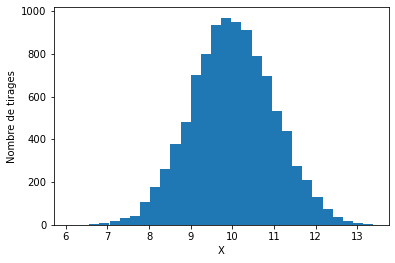

In [5]:
plt.hist(X, bins=30)
plt.xlabel('X')
plt.ylabel('Nombre de tirages')
plt.show()

On peut vérifier que la moyenne et l'écart-type sont corrects :

In [6]:
print("Moyenne des X : ", np.mean(X) )
print("Écart-type des X : ", np.std(X,ddof=1) )

Moyenne des X :  10.005094460939624
Écart-type des X :  0.9911473108606683


## 2-Tirage aléatoire des $\lbrace Y_1 , ... Y_n \rbrace$

On commence par définir les paramètres $Y_{\text{mes}}$ et $u(Y)$ :

In [7]:
Y_mes = 50
uY = 2

On réalise le tirage aléatoire par une loi normale et on l'enregistre dans un tableau X

In [8]:
Y = np.random.normal(Y_mes, uY, size=N_tirages)
print(Y)

[50.02748443 52.3619343  47.57008472 ... 47.61017073 49.9344913
 45.02745798]


On affiche un histogramme des valeurs pour vérification graphique

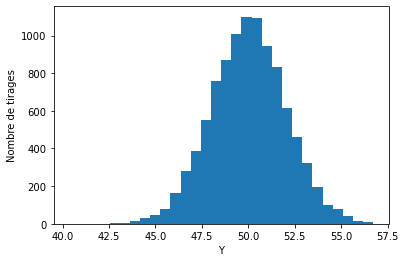

In [9]:
plt.hist(Y, bins=30)
plt.xlabel('Y')
plt.ylabel('Nombre de tirages')
plt.show()

On peut vérifier que la moyenne et l'écart-type sont corrects :

In [10]:
print("Moyenne des Y : ", np.mean(Y) )
print("Écart-type des Y : ", np.std(Y,ddof=1) )

Moyenne des Y :  50.01936537436627
Écart-type des Y :  2.016803298110922


## 3-Calcul des $\lbrace Z_1, ... , Z_n \rbrace$ et analyse statistique

In [11]:
Z = X * Y
print(Z)

# REMARQUE IMPORTANTE :
# le calcul sur les tableaux numpy est vectorisé, ce qui signifie qu'écrire Z = X * Y
# revient exactement à écrire la boucle suivante :
# for i in range(N_tirages):
#      Z[i] = X[i] * Y[i]

# l'autre avantage est qu'il n'y a pas besoin de créer le tableau Z en avance, le programme devine sa taille

# Ces tableaux, contrairement aux tableaux python de base, sont faits pour le calcul scientifique et IL FAUT S'EN SERVIR

[437.59939521 440.65661704 429.29682161 ... 384.4859686  503.29732787
 356.34094927]


Affichage d'un histogramme des valeurs obtenues pour $Z$ :

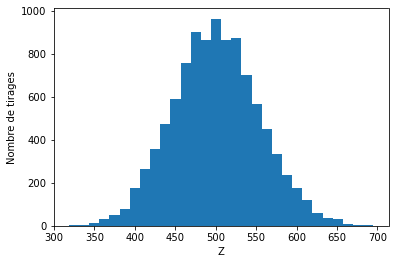

In [12]:
plt.hist(Z, bins=30)
plt.xlabel('Z')
plt.ylabel('Nombre de tirages')
plt.show()

Résultats statistiques

In [13]:
print("Moyenne des Z : ", np.mean(Z) )
print("Écart-type des Z : ", np.std(Z,ddof=1) )

Moyenne des Z :  500.4221220088517
Écart-type des Z :  53.33244918998396


### Vérification par le calcul théorique

Pour une somme $Z = X+Y$ on doit avoir $u(Z) = \sqrt{ u(X)^2 + u(Y)^2 }$

In [14]:
print( ( uX**2 + uY**2 )**0.5 )

2.23606797749979


Pour un produit $Z = X*Y$ on doit avoir $u(Z) = Z * \sqrt{ \left(\frac{u(X)}{X} \right)^2 + \left(\frac{u(Y)}{Y} \right)^2 }  $

In [15]:
print( X_mes*Y_mes * ( (uX/X_mes)**2 + (uY/Y_mes)**2 )**0.5 )

53.85164807134505
